<a href="https://colab.research.google.com/github/MaksymilianSzymczak/ML24/blob/main/domowe_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: EM Clustering in 2D**
-------------------------------

You have seen how the **Expectation-Maximization (EM)** algorithm can fit a Gaussian Mixture Model (GMM) to a 2D dataset. You should now explore:

## **Primary Question**

**How can we visualize the *decision boundary* for attributing a *new* (unlabeled) point to one of the GMM clusters?**  

In other words, given a 2D data distribution modeled by EM, think of a way to clearly show (on a plot) *which* cluster a point would be assigned to (or which cluster has the highest responsibility (posterior probability) for that point)?  

The plot should comprehensively cover the entire visible region, ensuring that for any point on the plot, it is immediately evident which cluster it would belong to. You can plot **lines** separating clusters or use a **color map** showing each point's "most likely cluster".

You can illustrate your approach with **the same** 2D dataset that we used in class, or you can find another suitable 2D dataset, it's up to you. Note however, that having 3 clusters enhances the clarity of the visualization—while 2 clusters result in overly simple boundaries, using 4 or more clusters can make the entire plot difficult to interpret. Try to choose a dataset with 3 clusters.

Discuss any irregularities observed in the resulting plot. If a decision boundary suggests that a region should be attributed to a cluster in a counterintuitive way (we saw it in class!), provide an explanation for why this might occur. It may be also an indication you have a bug in your code.

## **Secondary Question**

**If we *didn't know* the number of clusters in advance, how could we decide on a suitable $K$ for the clustering algorithm?**  

You can illustrate your approach with **the same** dataset as in the primary question by trying different values of $K$ (and optionally plotting the evaluation metric values, e.g. silhouette scores, etc.). Or you can find another suitable dataset, it's up to you. Note, that the dataset doesn't need to be 2D in this task.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code (e.g. `scikit-learn` for GMM) to visualize:
       1. The **data** and **cluster assignments**.
       2. The **decision boundary** (lines or a color map) indicating each cluster's region.
       3. A demonstration (chart or table) of how you would pick a suitable number of clusters $K$ when it is not known.
   - Remember to use the `$` symbol to delimit **inline equations** and `$$` to delimit **full-line equations**.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.



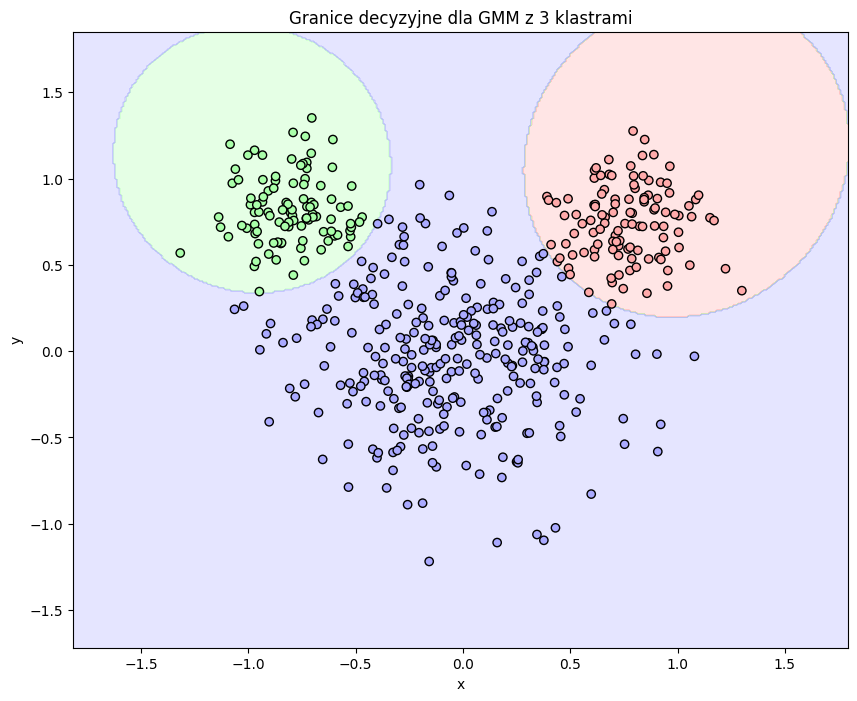

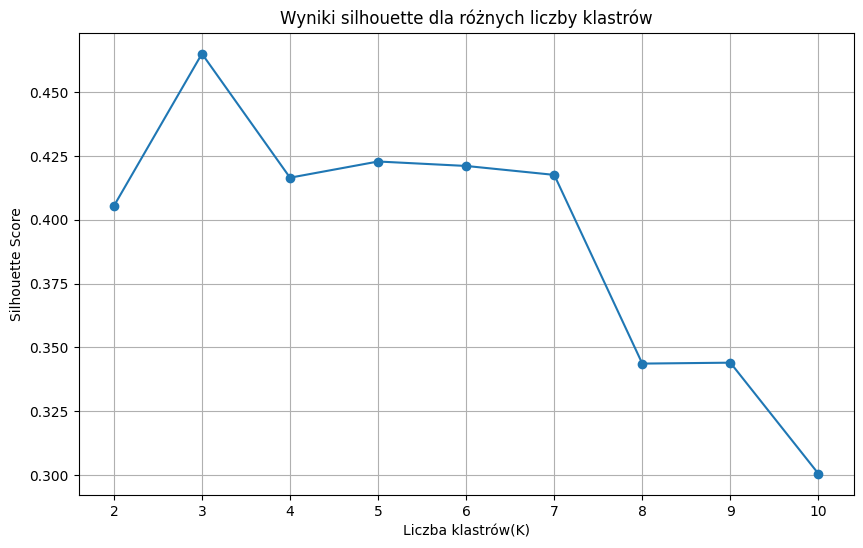

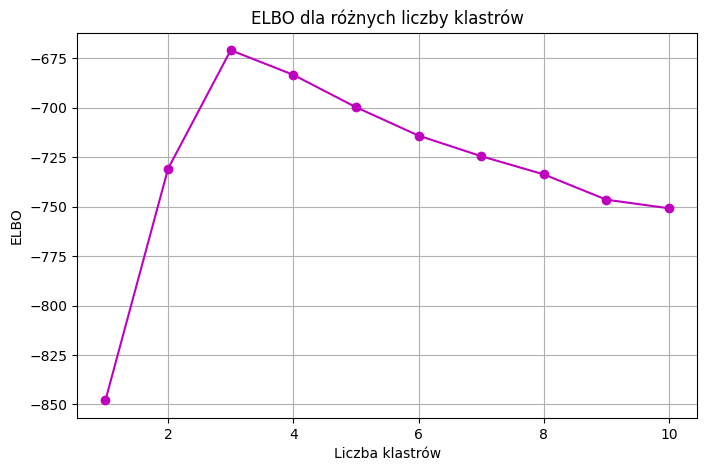

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score

# Generowanie danych
np.random.seed(0)

# Klastr 1
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
 [0.0, 0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# Klastr 2
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
 [0.0, 0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# Klastr 3
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
 [0.0, 0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Połączenie danych
data_X = np.vstack([data1, data2, data3])

# Dopasowanie modelu GMM z 3 klastrami
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(data_X)

# Wizualizacja granic decyzyjnych
def plot_decision_boundaries(gmm, data_X):
    # Tworzenie siatki punktów do wizualizacji
    x_min, x_max = data_X[:, 0].min() - 0.5, data_X[:, 0].max() + 0.5
    y_min, y_max = data_X[:, 1].min() - 0.5, data_X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Przewidywanie prawdopodobieństw przynależności do klastrów
    Z = gmm.predict_proba(grid_points)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    # Kolory dla klastrów
    colors = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

    # Wykres granic decyzyjnych
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.3)
    plt.scatter(data_X[:, 0], data_X[:, 1], c=gmm.predict(data_X), cmap=colors, edgecolor='k')
    plt.title('Granice decyzyjne dla GMM z 3 klastrami')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

plot_decision_boundaries(gmm, data_X)

# Wybór odpowiedniej liczby klastrów
def select_number_of_clusters(data_X, max_clusters=10):
    silhouette_scores = []
    for n in range(2, max_clusters + 1):
        gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
        labels = gmm.fit_predict(data_X)
        score = silhouette_score(data_X, labels)
        silhouette_scores.append(score)

    # Wykres wyników silhouette
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Wyniki silhouette dla różnych liczby klastrów')
    plt.xlabel('Liczba klastrów(K)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

select_number_of_clusters(data_X)



def select_number_of_clusters_log_likelihood(data_X, max_clusters=10):
    log_likelihoods = []
    for n in range(1, max_clusters + 1):
        gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
        gmm.fit(data_X)
        log_likelihoods.append(gmm.score(data_X))  # Log-likelihood dla danych


def select_number_of_clusters_elbo(data_X, max_clusters=10):
    elbo_scores = []
    for n in range(1, max_clusters + 1):
        gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
        gmm.fit(data_X)
        log_likelihood = gmm.score(data_X) * len(data_X)  # Log-likelihood dla całego zbioru danych
        # ELBO można przybliżyć jako log-likelihood minus kara za złożoność
        # (np. liczba parametrów modelu)
        n_params = n * (1 + 2 * data_X.shape[1])  # Liczba parametrów dla GMM
        elbo = log_likelihood - 0.5 * n_params * np.log(len(data_X))  # Przybliżenie ELBO
        elbo_scores.append(elbo)

    # Wykres wyników ELBO
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), elbo_scores, marker='o', color='m')
    plt.title('ELBO dla różnych liczby klastrów')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('ELBO')
    plt.grid(True)
    plt.show()

# Uruchomienie funkcji na danych
select_number_of_clusters_elbo(data_X)

Odpowiedzi
#Primary Question: How can we visualize the decision boundary for attributing a new (unlabeled) point to one of the GMM clusters?
Wizualizacja granic decyzyjnych dla algorytmu EM polega na przypisaniu każdemu punktowi na siatce 2D klastra z najwyższym prawdopodobieństwem przynależności, co jest pokazane kolorami i liniami konturowymi. Granice są gładkie, ale mogą wydawać się nieintuicyjne, np. gdy obszary jednego klastra otaczają inny klaster, co wynika z nakładania się rozkładów Gaussa i różnic w ich wariancjach. Przykładowo, fioletowy obszar może dominować na wykresie (nad zielonym i czerwonym), ponieważ odpowiadający mu klaster ma większą wariancję, co sprawia, że punkty z obrzeży częściej do niego należą. Algorytm EM działa w ten sposób, ponieważ maksymalizuje prawdopodobieństwo przynależności punktów do klastrów, uwzględniając parametry rozkładów Gaussa.

#Secondary Question: If we didn't know the number of clusters in advance, how could we decide on a suitable  K  for the clustering algorithm?

3 to optymalna liczba klastrów.

Aby wybrać odpowiednią liczbę klastrów jak jej nie znamy, możemy skorzystać z metody ELBO z zajęć.

ELBO działa, ponieważ jest bezpośrednio związane z optymalizacją modelu GMM w algorytmie EM, równoważąc dopasowanie modelu do danych z jego złożonością. W naszym przypadku ELBO oblicza się dla różnych wartości
K, a następnie wybiera się tę wartość, która maksymalizuje ELBO, co odpowiada najlepszemu kompromisowi między dokładnością a prostotą modelu. Dla małych
K ELBO rośnie, gdyż model lepiej opisuje dane, ale dla zbyt dużych (u nas większych niż 3) ELBO zaczyna spadać. Dzięki temu ELBO pozwala wybrać optymalną liczbę klastrów, która najlepiej oddaje strukturę danych bez niepotrzebnego komplikowania modelu.

